In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
# Load PISCO binned datasets (0-100 dbar)
print("=== LOADING PISCO DATASETS ===\n")

pisco_profiles = ['M181_CTD-037', 'M181_CTD-075', 'M181_CTD-060', 'M181_CTD-081', 'M181_CTD-050']
pisco_data = {}

for profile in pisco_profiles:
    filename = f"{profile}_binned_data.csv"
    try:
        df = pd.read_csv(filename)
        
        # Filter to 0-100 dbar
        depth_filter = []
        for bin_label in df['pressure_bin']:
            start_depth = int(bin_label.split('-')[0])
            depth_filter.append(start_depth <= 100)
        
        filtered_df = df[depth_filter]
        
        if len(filtered_df) > 0:
            # Calculate totals
            total_volume = filtered_df['sampled_volume_L'].sum()
            
            # Get categories
            count_cols = [col for col in filtered_df.columns if col.startswith('count_') and not col.startswith('count_per_L')]
            categories = [col.replace('count_', '') for col in count_cols]
            
            profile_data = {
                'total_volume': total_volume,
                'total_counts': {}
            }
            
            # Sum counts for each category
            for category in categories:
                count_col = f'count_{category}'
                if count_col in filtered_df.columns:
                    total_count = filtered_df[count_col].sum()
                    count_per_L = total_count / total_volume if total_volume > 0 else 0
                    profile_data['total_counts'][category] = count_per_L
            
            pisco_data[profile] = profile_data
            print(f"Loaded {profile}: {len(filtered_df)} bins, {total_volume:.3f}L")
            
    except FileNotFoundError:
        print(f"File {filename} not found")

print(f"\nLoaded {len(pisco_data)} PISCO profiles")

=== LOADING PISCO DATASETS ===

Loaded M181_CTD-037: 19 bins, 2940.217L
Loaded M181_CTD-075: 19 bins, 3076.837L
Loaded M181_CTD-060: 19 bins, 2203.238L
Loaded M181_CTD-081: 20 bins, 4820.185L
Loaded M181_CTD-050: 20 bins, 3159.578L

Loaded 5 PISCO profiles


In [19]:
# Load UVP5 binned datasets (0-100m)
print("=== LOADING UVP5 DATASETS ===\n")

uvp5_profiles = ['UVP5_M181-CTD-037', 'UVP5_M181-CTD-050', 'UVP5_M181-CTD-060', 'UVP5_M181-CTD-075', 'UVP5_M181-CTD-081']
uvp5_data = {}

for profile in uvp5_profiles:
    filename = f"{profile}_crop_binned_normalized.csv"
    try:
        df = pd.read_csv(filename)
        
        # Filter to 0-100m
        depth_filter = []
        for bin_label in df['depth_bin']:
            if pd.notna(bin_label):
                start_depth = int(bin_label.split('-')[0])
                depth_filter.append(start_depth <= 100)
            else:
                depth_filter.append(False)
        
        filtered_df = df[depth_filter]
        
        if len(filtered_df) > 0:
            # Calculate totals
            total_volume = filtered_df['sampled_volume_L'].sum()
            
            # Get categories
            count_cols = [col for col in filtered_df.columns if col.startswith('count_') and not col.startswith('count_per_L')]
            categories = [col.replace('count_', '') for col in count_cols]
            
            profile_data = {
                'total_volume': total_volume,
                'total_counts': {}
            }
            
            # Sum counts for each category
            for category in categories:
                count_col = f'count_{category}'
                if count_col in filtered_df.columns:
                    total_count = filtered_df[count_col].sum()
                    count_per_L = total_count / total_volume if total_volume > 0 else 0
                    profile_data['total_counts'][category] = count_per_L
            
            uvp5_data[profile] = profile_data
            print(f"Loaded {profile}: {len(filtered_df)} bins, {total_volume:.3f}L")
            
    except FileNotFoundError:
        print(f"File {filename} not found")

print(f"\nLoaded {len(uvp5_data)} UVP5 profiles")

=== LOADING UVP5 DATASETS ===

Loaded UVP5_M181-CTD-037: 21 bins, 4235.840L
Loaded UVP5_M181-CTD-050: 21 bins, 4294.080L
Loaded UVP5_M181-CTD-060: 21 bins, 4751.040L
Loaded UVP5_M181-CTD-075: 21 bins, 4644.640L
Loaded UVP5_M181-CTD-081: 21 bins, 4206.720L

Loaded 5 UVP5 profiles


In [20]:
uvp5_data

{'UVP5_M181-CTD-037': {'total_volume': 4235.84,
  'total_counts': {'Cnidaria<Metazoa': 0.0,
   'Copepoda_total': 0.018650373951801767,
   'Rhizaria': 0.01227619551257838,
   'Trichodesmium': 0.019358616000604366}},
 'UVP5_M181-CTD-050': {'total_volume': 4294.08,
  'total_counts': {'Appendicularia': 0.0,
   'Cnidaria<Metazoa': 0.0,
   'Copepoda_total': 0.03097287428273344,
   'Rhizaria': 0.023520754154556973,
   'Trichodesmium': 0.3372084357999851}},
 'UVP5_M181-CTD-060': {'total_volume': 4751.040000000001,
  'total_counts': {'Appendicularia': 0.000210480231696639,
   'Cnidaria<Metazoa': 0.000420960463393278,
   'Copepoda_total': 0.043148447497811,
   'Rhizaria': 0.028204351047349627,
   'Trichodesmium': 0.21237455378190875}},
 'UVP5_M181-CTD-075': {'total_volume': 4644.639999999999,
  'total_counts': {'Copepoda_total': 0.008827379517034691,
   'Rhizaria': 0.017654759034069382,
   'Trichodesmium': 0.027343346308863554}},
 'UVP5_M181-CTD-081': {'total_volume': 4206.72,
  'total_counts': 

=== CREATING COMPARISON PLOT ===

Categories found: ['Appendicularia', 'Cnidaria', 'Cnidaria<Metazoa', 'Copepoda', 'Copepoda_total', 'Rhizaria', 'Thaliacea', 'Trichodesmium']


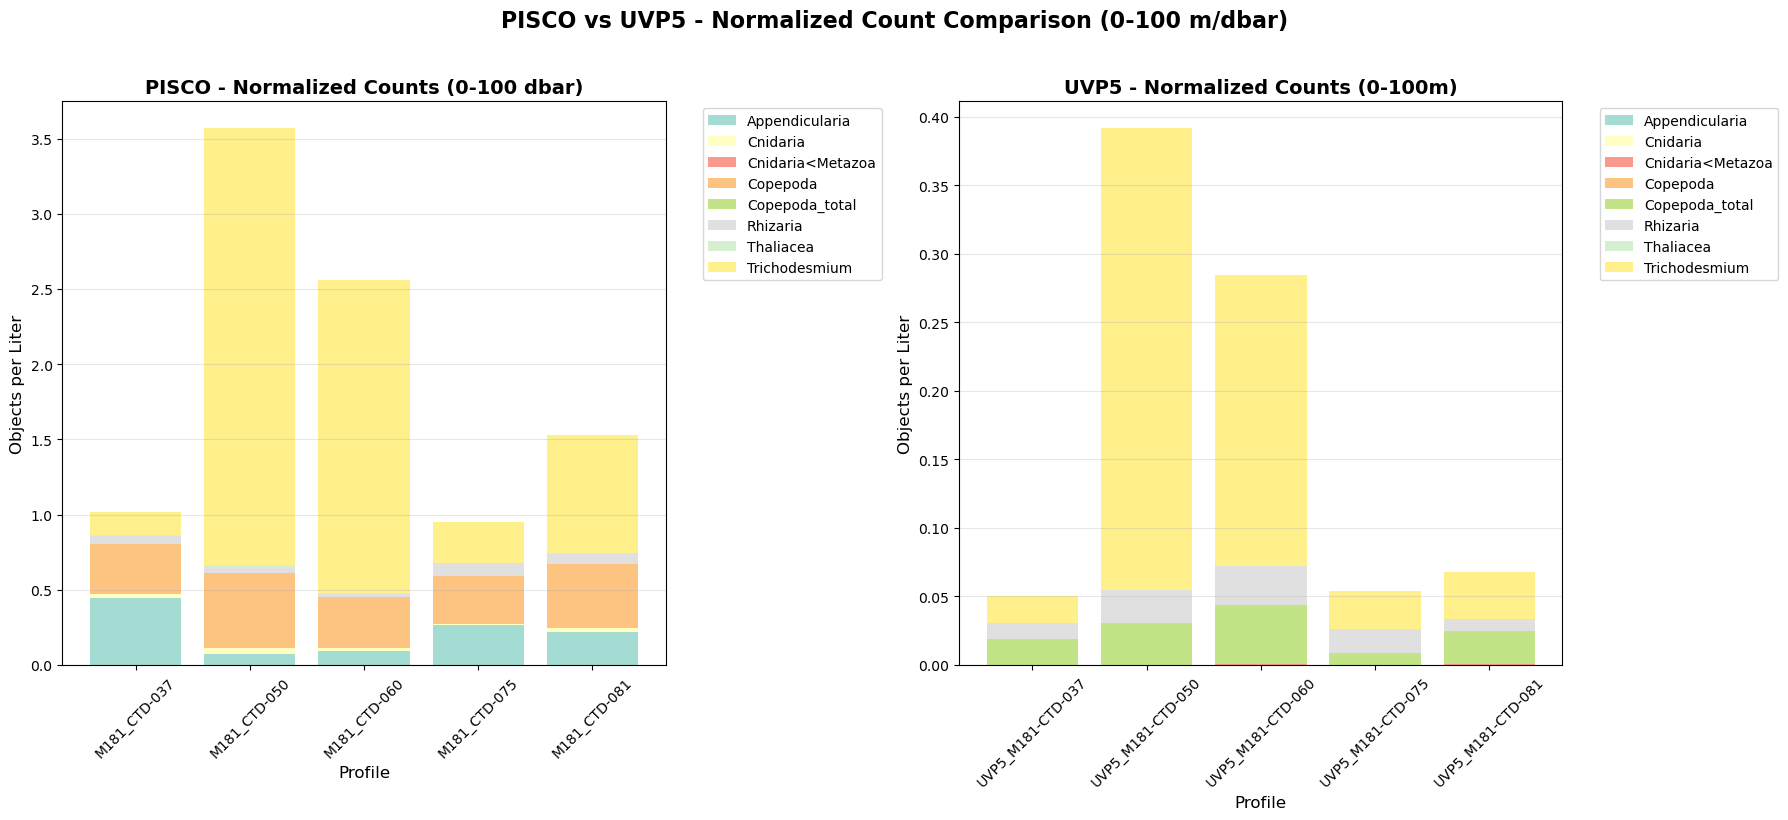


=== PLOT COMPLETE ===


In [21]:
# Create comparison plot: PISCO vs UVP5 normalized counts (0-100m/dbar)
print("=== CREATING COMPARISON PLOT ===\n")

# Get all unique categories from both datasets
all_categories = set()
for profile_data in pisco_data.values():
    all_categories.update(profile_data['total_counts'].keys())
for profile_data in uvp5_data.values():
    all_categories.update(profile_data['total_counts'].keys())

categories = sorted(list(all_categories))
print(f"Categories found: {categories}")

# Create colors for categories
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
color_map = dict(zip(categories, colors))

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: PISCO data
if len(pisco_data) > 0:
    pisco_profiles_sorted = sorted(pisco_data.keys(), key=lambda x: int(x.split('-')[-1]))
    bottom_counts = np.zeros(len(pisco_profiles_sorted))
    
    for category in categories:
        values = []
        for profile in pisco_profiles_sorted:
            count_per_L = pisco_data[profile]['total_counts'].get(category, 0)
            values.append(count_per_L)
        
        ax1.bar(pisco_profiles_sorted, values, bottom=bottom_counts,
                label=category, color=color_map[category], alpha=0.8)
        bottom_counts += np.array(values)
    
    ax1.set_title('PISCO - Normalized Counts (0-100 dbar)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Profile', fontsize=12)
    ax1.set_ylabel('Objects per Liter', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax1.grid(axis='y', alpha=0.3)

# Plot 2: UVP5 data
if len(uvp5_data) > 0:
    uvp5_profiles_sorted = sorted(uvp5_data.keys(), key=lambda x: int(x.split('-')[-1]))
    bottom_counts = np.zeros(len(uvp5_profiles_sorted))
    
    for category in categories:
        values = []
        for profile in uvp5_profiles_sorted:
            count_per_L = uvp5_data[profile]['total_counts'].get(category, 0)
            values.append(count_per_L)
        
        ax2.bar(uvp5_profiles_sorted, values, bottom=bottom_counts,
                label=category, color=color_map[category], alpha=0.8)
        bottom_counts += np.array(values)
    
    ax2.set_title('UVP5 - Normalized Counts (0-100m)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Profile', fontsize=12)
    ax2.set_ylabel('Objects per Liter', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax2.grid(axis='y', alpha=0.3)

plt.suptitle('PISCO vs UVP5 - Normalized Count Comparison (0-100 m/dbar)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n=== PLOT COMPLETE ===")

In [22]:
# Print summary statistics for comparison
print("=== PISCO SUMMARY (0-100 dbar) ===")
for profile in sorted(pisco_data.keys(), key=lambda x: int(x.split('-')[-1])):
    total_per_L = sum(pisco_data[profile]['total_counts'].values())
    volume = pisco_data[profile]['total_volume']
    print(f"{profile}: {total_per_L:.3f} objects/L, Volume: {volume:.3f}L")

print("\n=== UVP5 SUMMARY (0-100m) ===")
for profile in sorted(uvp5_data.keys(), key=lambda x: int(x.split('-')[-1])):
    total_per_L = sum(uvp5_data[profile]['total_counts'].values())
    volume = uvp5_data[profile]['total_volume']
    print(f"{profile}: {total_per_L:.3f} objects/L, Volume: {volume:.3f}L")

print("\n=== CATEGORY BREAKDOWN ===")
print("\nPISCO - Average objects/L by category:")
pisco_category_avg = {}
for category in categories:
    total = sum(pisco_data[p]['total_counts'].get(category, 0) for p in pisco_data.keys())
    avg = total / len(pisco_data) if len(pisco_data) > 0 else 0
    pisco_category_avg[category] = avg
    print(f"  {category}: {avg:.4f}")

print("\nUVP5 - Average objects/L by category:")
uvp5_category_avg = {}
for category in categories:
    total = sum(uvp5_data[p]['total_counts'].get(category, 0) for p in uvp5_data.keys())
    avg = total / len(uvp5_data) if len(uvp5_data) > 0 else 0
    uvp5_category_avg[category] = avg
    print(f"  {category}: {avg:.4f}")

=== PISCO SUMMARY (0-100 dbar) ===
M181_CTD-037: 1.016 objects/L, Volume: 2940.217L
M181_CTD-050: 3.569 objects/L, Volume: 3159.578L
M181_CTD-060: 2.557 objects/L, Volume: 2203.238L
M181_CTD-075: 0.953 objects/L, Volume: 3076.837L
M181_CTD-081: 1.531 objects/L, Volume: 4820.185L

=== UVP5 SUMMARY (0-100m) ===
UVP5_M181-CTD-037: 0.050 objects/L, Volume: 4235.840L
UVP5_M181-CTD-050: 0.392 objects/L, Volume: 4294.080L
UVP5_M181-CTD-060: 0.284 objects/L, Volume: 4751.040L
UVP5_M181-CTD-075: 0.054 objects/L, Volume: 4644.640L
UVP5_M181-CTD-081: 0.068 objects/L, Volume: 4206.720L

=== CATEGORY BREAKDOWN ===

PISCO - Average objects/L by category:
  Appendicularia: 0.2196
  Cnidaria: 0.0244
  Cnidaria<Metazoa: 0.0000
  Copepoda: 0.3835
  Copepoda_total: 0.0000
  Rhizaria: 0.0541
  Thaliacea: 0.0052
  Trichodesmium: 1.2385

UVP5 - Average objects/L by category:
  Appendicularia: 0.0000
  Cnidaria: 0.0000
  Cnidaria<Metazoa: 0.0002
  Copepoda: 0.0000
  Copepoda_total: 0.0251
  Rhizaria: 0.0181


=== CREATING PISCO vs UVP5 VERTICAL DISTRIBUTION COMPARISON ===


=== Creating comparison for M181_CTD-037 vs UVP5_M181-CTD-037 ===


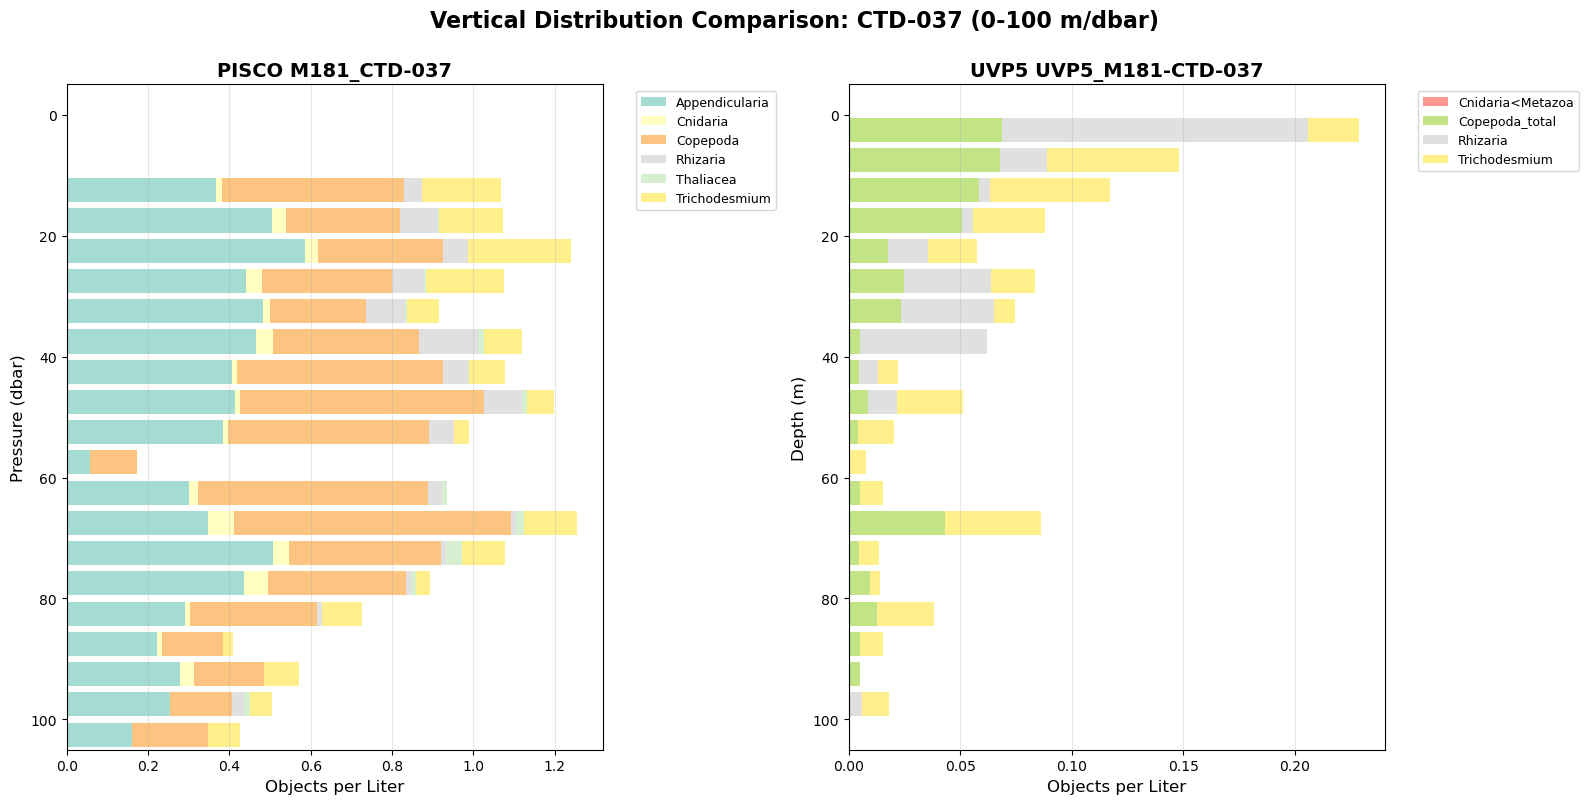

Created comparison plot for CTD-037

=== Creating comparison for M181_CTD-050 vs UVP5_M181-CTD-050 ===


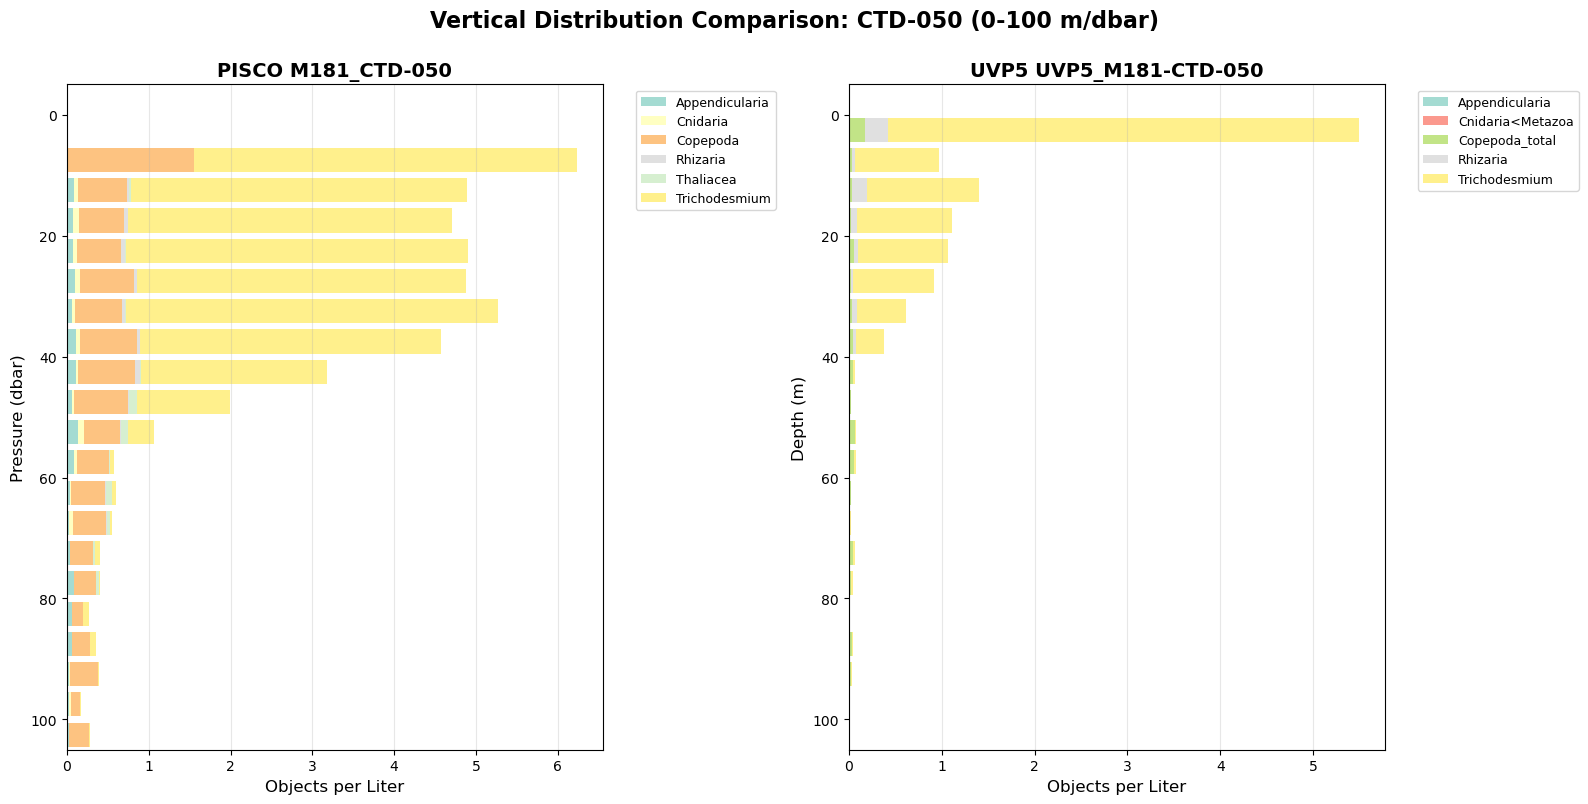

Created comparison plot for CTD-050

=== Creating comparison for M181_CTD-060 vs UVP5_M181-CTD-060 ===


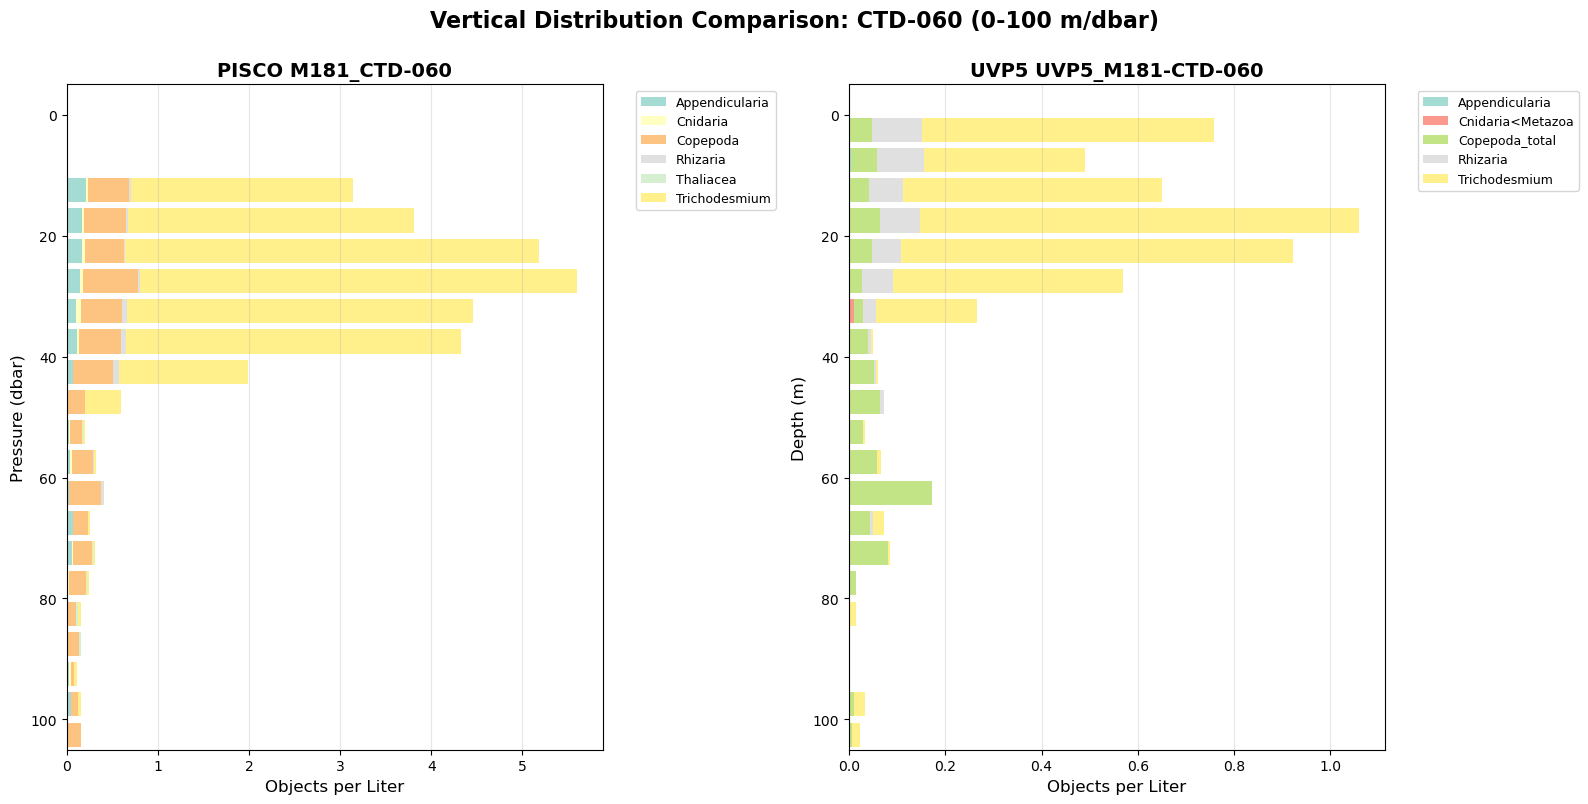

Created comparison plot for CTD-060

=== Creating comparison for M181_CTD-075 vs UVP5_M181-CTD-075 ===


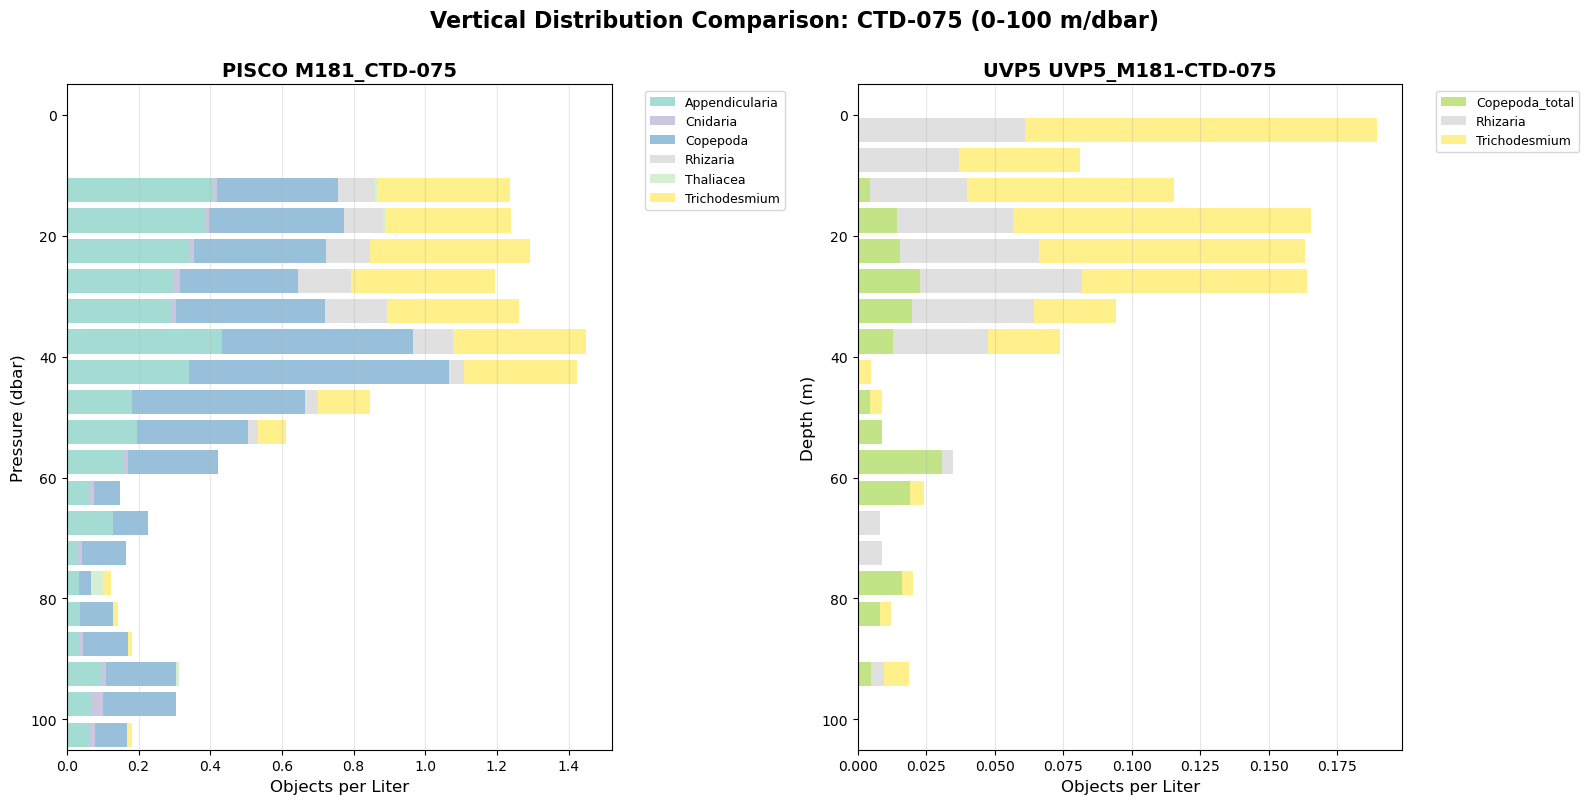

Created comparison plot for CTD-075

=== Creating comparison for M181_CTD-081 vs UVP5_M181-CTD-081 ===


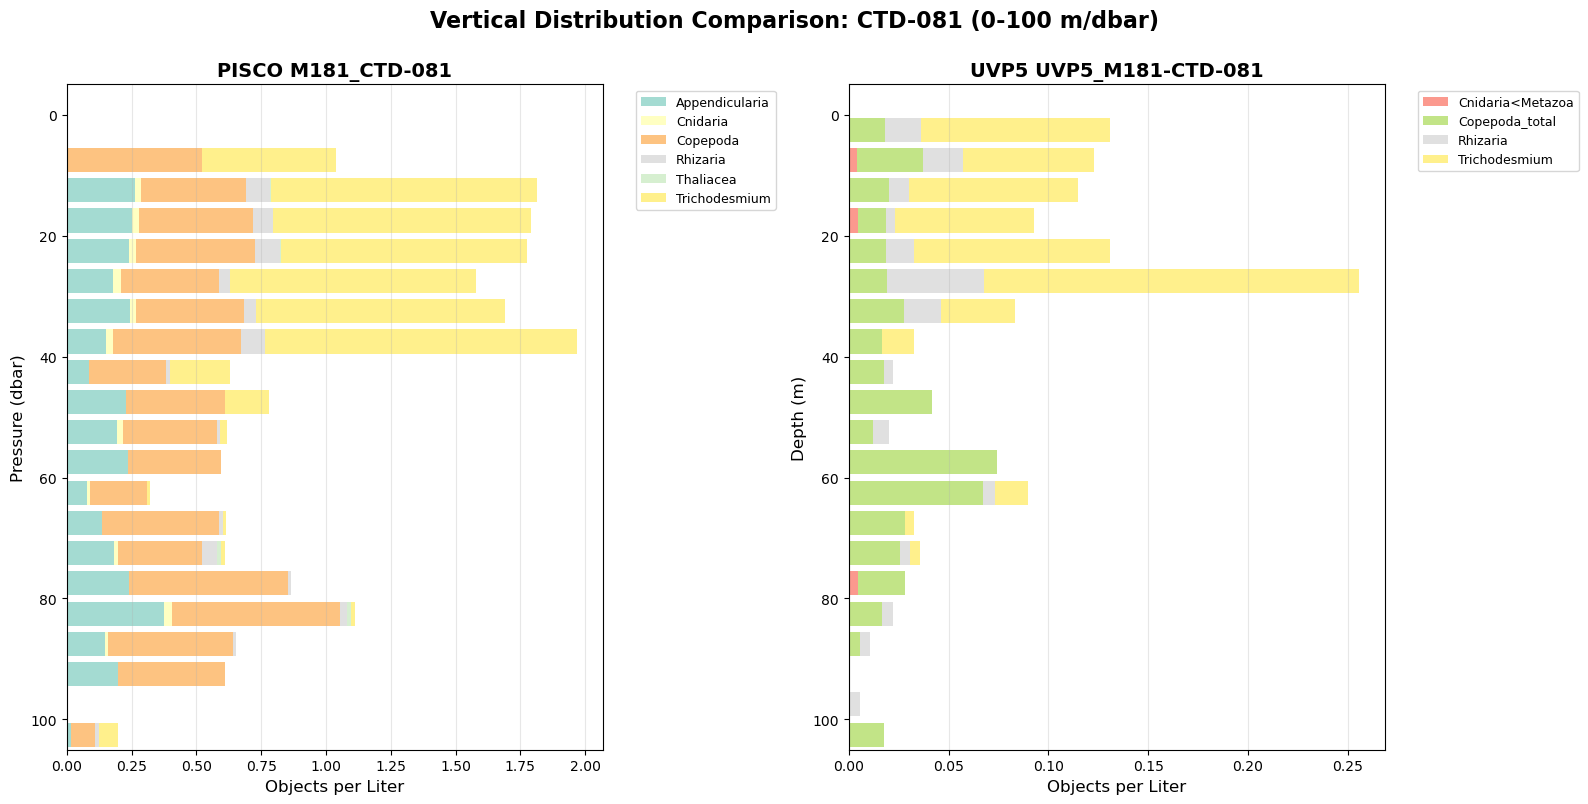

Created comparison plot for CTD-081

=== VERTICAL DISTRIBUTION COMPARISON COMPLETE ===


In [23]:
# Create side-by-side vertical distribution plots for PISCO and UVP5 profiles
print("=== CREATING PISCO vs UVP5 VERTICAL DISTRIBUTION COMPARISON ===\n")

# Define matching profiles
profile_pairs = [
    ('M181_CTD-037', 'UVP5_M181-CTD-037'),
    ('M181_CTD-050', 'UVP5_M181-CTD-050'),
    ('M181_CTD-060', 'UVP5_M181-CTD-060'),
    ('M181_CTD-075', 'UVP5_M181-CTD-075'),
    ('M181_CTD-081', 'UVP5_M181-CTD-081')
]

for pisco_profile, uvp5_profile in profile_pairs:
    print(f"\n=== Creating comparison for {pisco_profile} vs {uvp5_profile} ===")
    
    # Load PISCO data
    pisco_filename = f"{pisco_profile}_binned_data.csv"
    uvp5_filename = f"{uvp5_profile}_crop_binned_normalized.csv"
    
    try:
        # Load and filter PISCO data
        pisco_df = pd.read_csv(pisco_filename)
        
        depth_filter_pisco = []
        for bin_label in pisco_df['pressure_bin']:
            start_depth = int(bin_label.split('-')[0].replace('dbar', ''))
            depth_filter_pisco.append(start_depth <= 100)
        
        pisco_filtered = pisco_df[depth_filter_pisco].copy()
        
        # Load and filter UVP5 data
        uvp5_df = pd.read_csv(uvp5_filename)
        
        depth_filter_uvp5 = []
        for bin_label in uvp5_df['depth_bin']:
            if pd.notna(bin_label):
                start_depth = int(bin_label.split('-')[0].replace('m', ''))
                depth_filter_uvp5.append(start_depth <= 100)
            else:
                depth_filter_uvp5.append(False)
        
        uvp5_filtered = uvp5_df[depth_filter_uvp5].copy()
        
        if len(pisco_filtered) > 0 and len(uvp5_filtered) > 0:
            # Get categories from both datasets
            pisco_count_cols = [col for col in pisco_filtered.columns if col.startswith('count_') and not col.startswith('count_per_L')]
            uvp5_count_cols = [col for col in uvp5_filtered.columns if col.startswith('count_') and not col.startswith('count_per_L')]
            
            pisco_categories = [col.replace('count_', '') for col in pisco_count_cols]
            uvp5_categories = [col.replace('count_', '') for col in uvp5_count_cols]
            
            # Combine categories for consistent coloring
            all_categories = sorted(set(pisco_categories + uvp5_categories))
            colors = plt.cm.Set3(np.linspace(0, 1, len(all_categories)))
            color_map = dict(zip(all_categories, colors))
            
            # Create figure with two subplots side by side
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
            
            # Plot PISCO data (left)
            pisco_depth_midpoints = []
            for bin_label in pisco_filtered['pressure_bin']:
                start_depth = int(bin_label.split('-')[0].replace('dbar', ''))
                pisco_depth_midpoints.append(start_depth + 2.5)
            
            left_pisco = np.zeros(len(pisco_filtered))
            for category in pisco_categories:
                norm_col = f'count_per_L_{category}'
                if norm_col in pisco_filtered.columns:
                    values = pisco_filtered[norm_col].fillna(0).values
                    ax1.barh(pisco_depth_midpoints, values, left=left_pisco, height=4,
                            label=category, color=color_map[category], alpha=0.8)
                    left_pisco += values
            
            ax1.set_title(f'PISCO {pisco_profile}', fontsize=14, fontweight='bold')
            ax1.set_xlabel('Objects per Liter', fontsize=12)
            ax1.set_ylabel('Pressure (dbar)', fontsize=12)
            ax1.set_ylim(105, -5)
            ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
            ax1.grid(axis='x', alpha=0.3)
            
            # Plot UVP5 data (right)
            uvp5_depth_midpoints = []
            for bin_label in uvp5_filtered['depth_bin']:
                start_depth = int(bin_label.split('-')[0].replace('m', ''))
                uvp5_depth_midpoints.append(start_depth + 2.5)
            
            left_uvp5 = np.zeros(len(uvp5_filtered))
            for category in uvp5_categories:
                norm_col = f'count_per_L_{category}'
                if norm_col in uvp5_filtered.columns:
                    values = uvp5_filtered[norm_col].fillna(0).values
                    ax2.barh(uvp5_depth_midpoints, values, left=left_uvp5, height=4,
                            label=category, color=color_map[category], alpha=0.8)
                    left_uvp5 += values
            
            ax2.set_title(f'UVP5 {uvp5_profile}', fontsize=14, fontweight='bold')
            ax2.set_xlabel('Objects per Liter', fontsize=12)
            ax2.set_ylabel('Depth (m)', fontsize=12)
            ax2.set_ylim(105, -5)
            ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
            ax2.grid(axis='x', alpha=0.3)
            
            plt.suptitle(f'Vertical Distribution Comparison: CTD-{pisco_profile.split("-")[-1]} (0-100 m/dbar)',
                        fontsize=16, fontweight='bold', y=1.00)
            plt.tight_layout()
            plt.show()
            
            print(f"Created comparison plot for CTD-{pisco_profile.split('-')[-1]}")
            
    except FileNotFoundError as e:
        print(f"File not found: {e}")
    except Exception as e:
        print(f"Error processing {pisco_profile} vs {uvp5_profile}: {e}")

print("\n=== VERTICAL DISTRIBUTION COMPARISON COMPLETE ===")

=== CREATING PISCO vs UVP5 VERTICAL DISTRIBUTION COMPARISON (BIOVOLUME) ===


=== Creating biovolume comparison for M181_CTD-037 vs UVP5_M181-CTD-037 ===


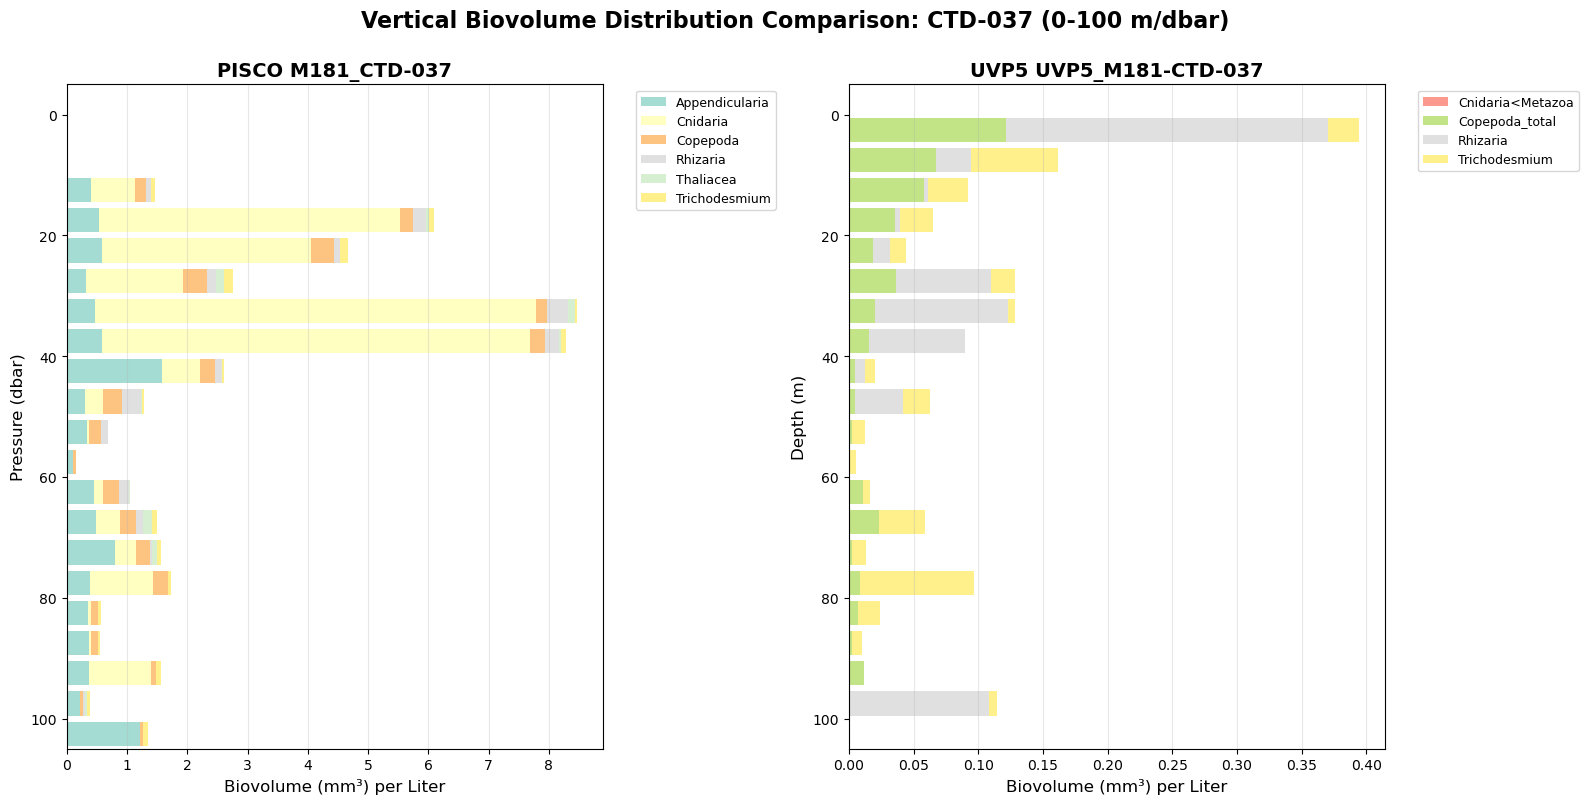

Created biovolume comparison plot for CTD-037

=== Creating biovolume comparison for M181_CTD-050 vs UVP5_M181-CTD-050 ===


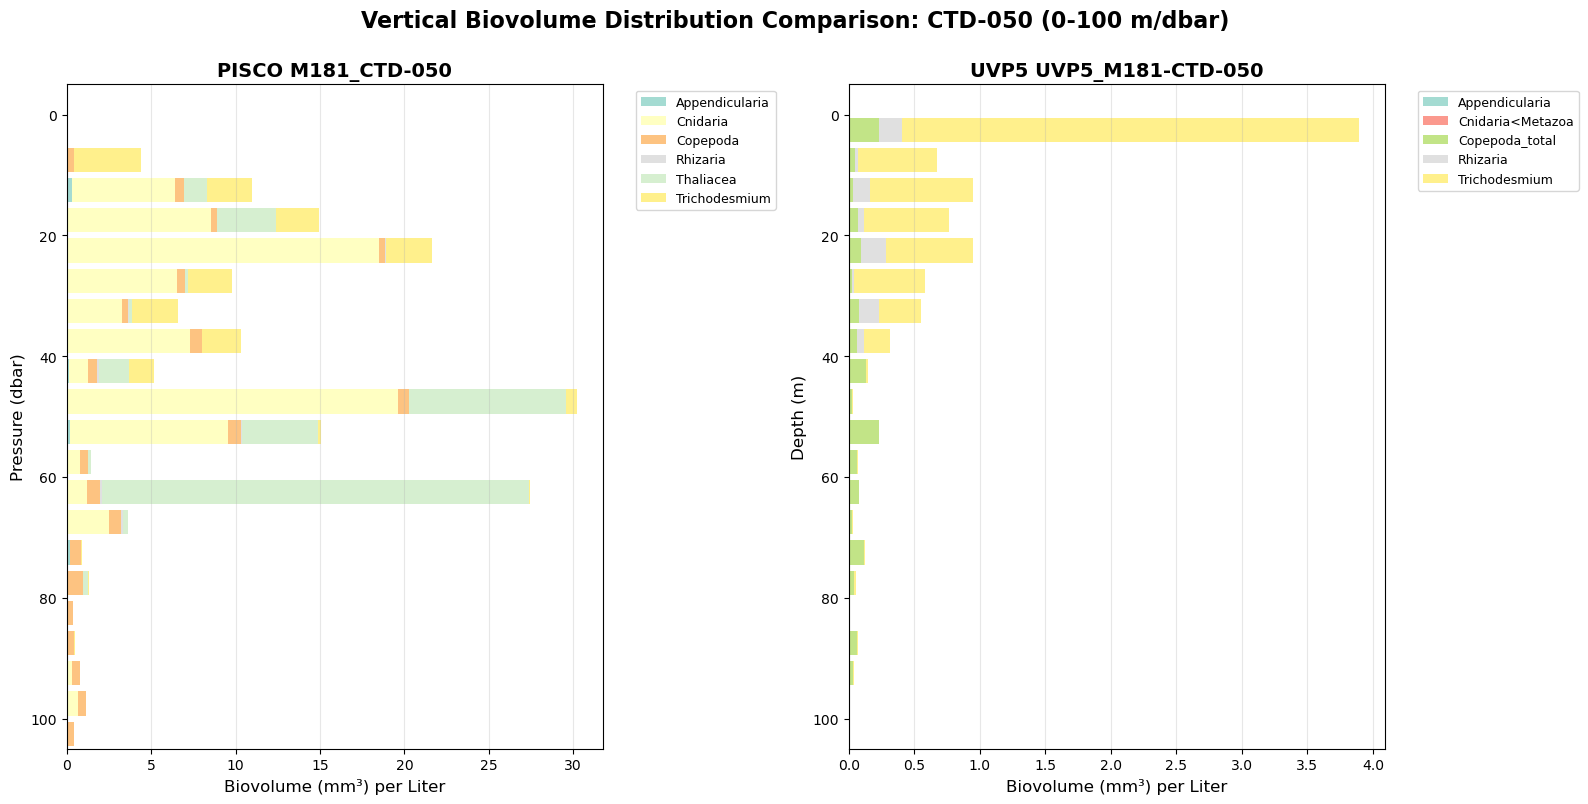

Created biovolume comparison plot for CTD-050

=== Creating biovolume comparison for M181_CTD-060 vs UVP5_M181-CTD-060 ===


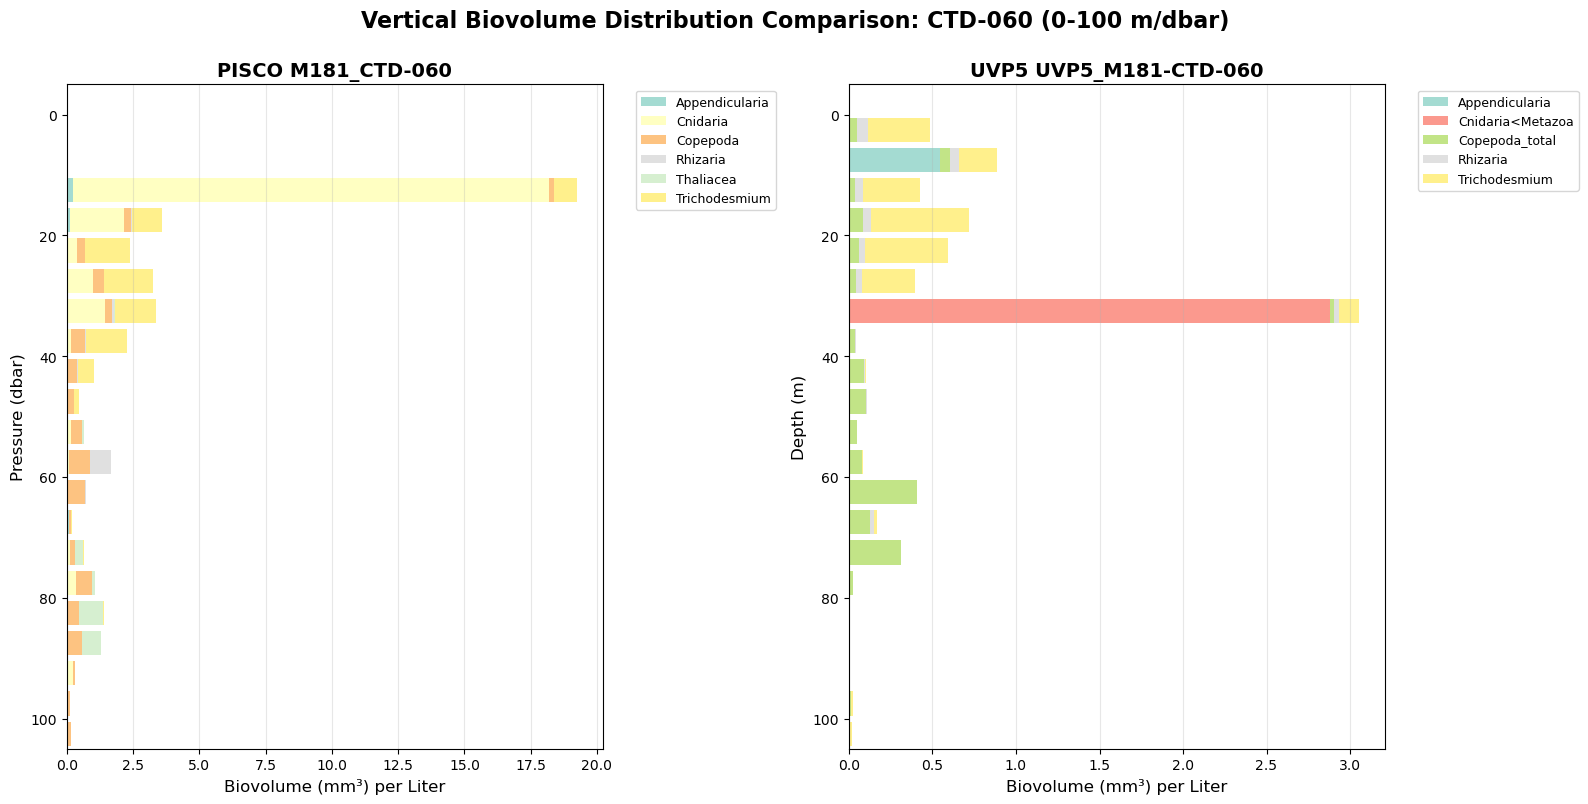

Created biovolume comparison plot for CTD-060

=== Creating biovolume comparison for M181_CTD-075 vs UVP5_M181-CTD-075 ===


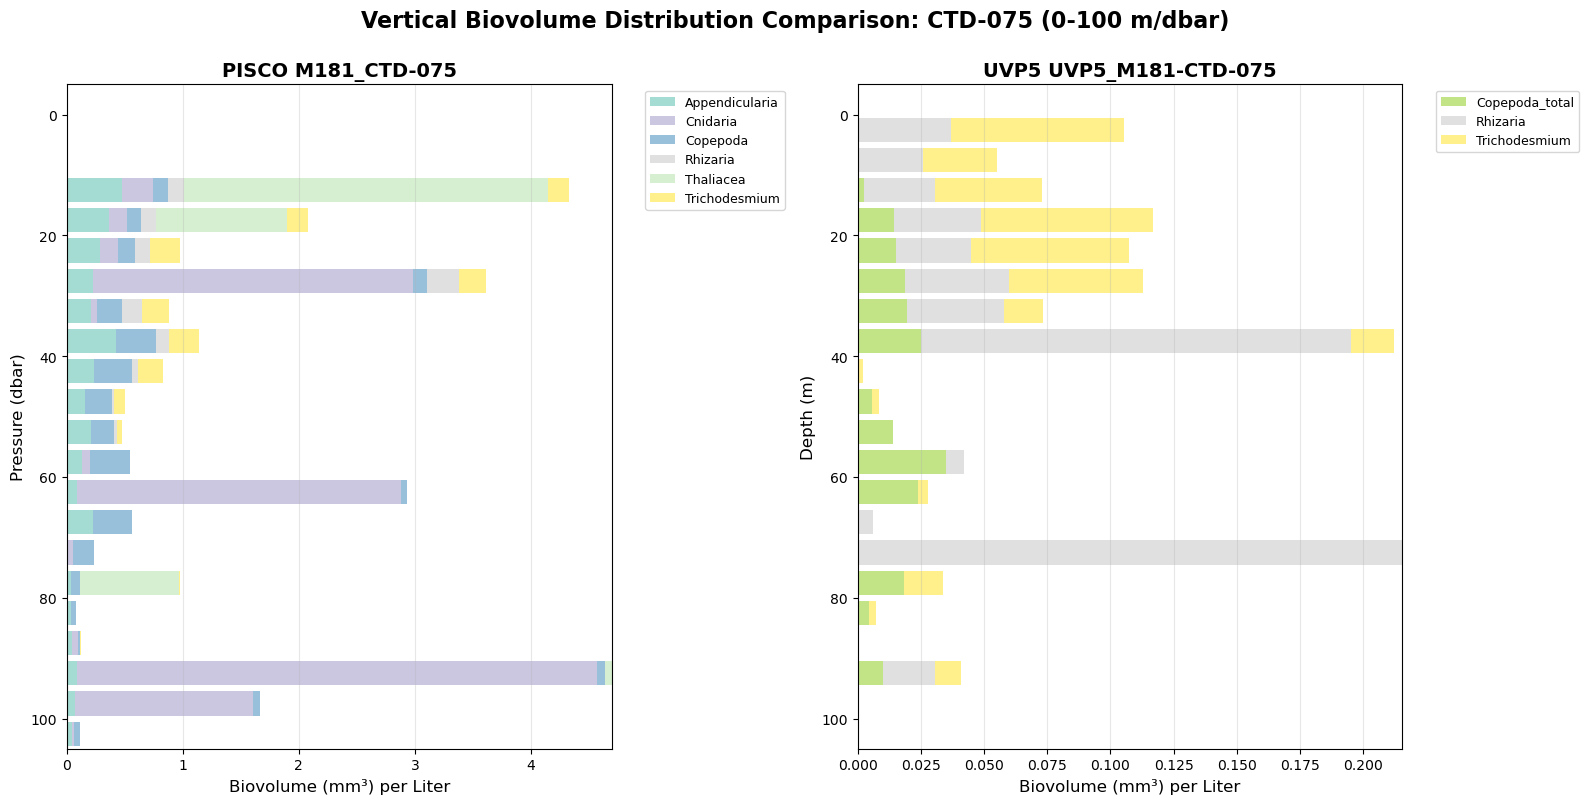

Created biovolume comparison plot for CTD-075

=== Creating biovolume comparison for M181_CTD-081 vs UVP5_M181-CTD-081 ===


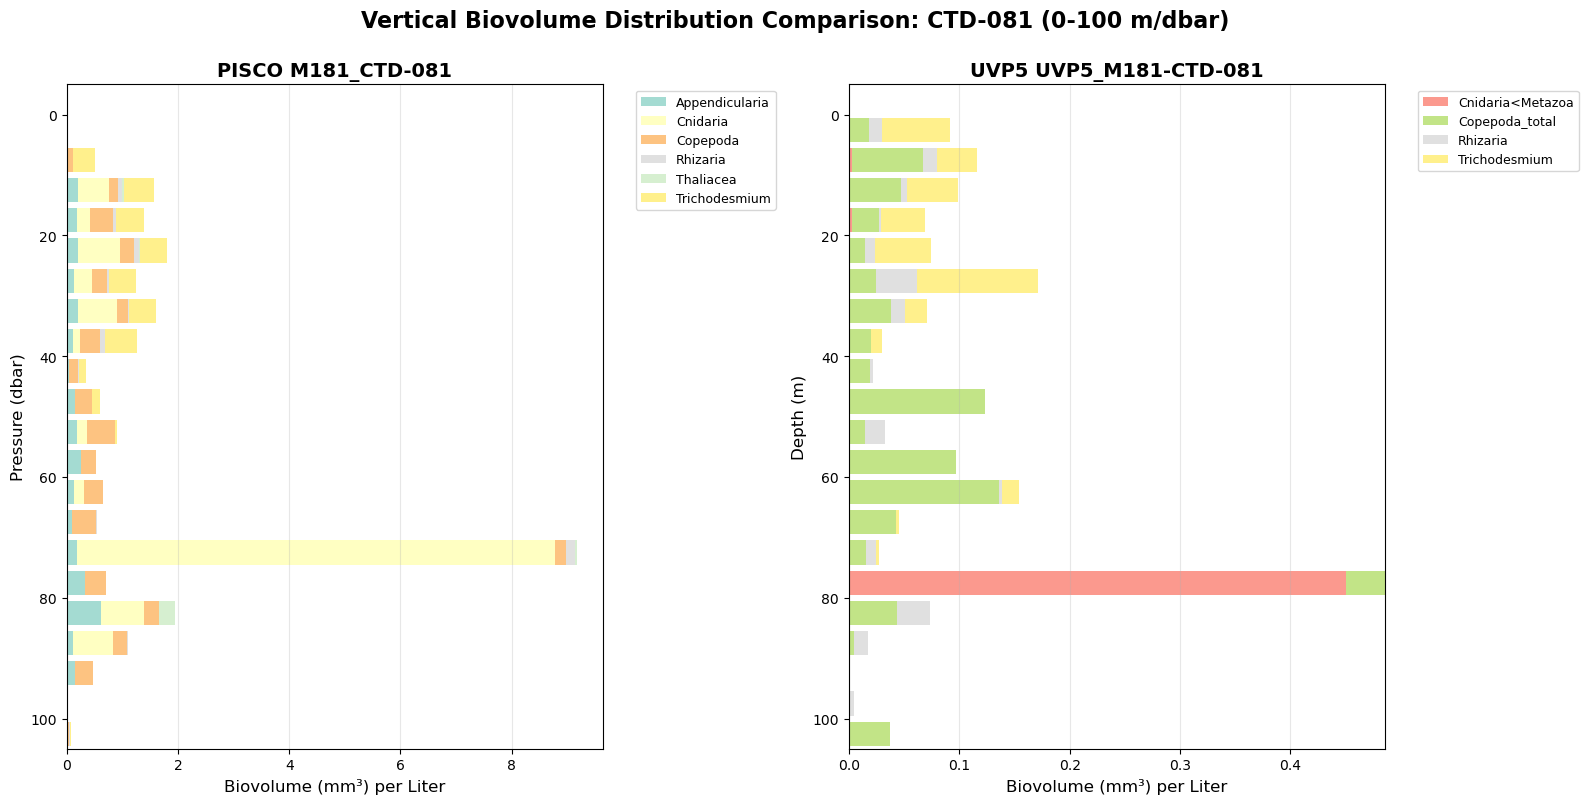

Created biovolume comparison plot for CTD-081

=== VERTICAL BIOVOLUME DISTRIBUTION COMPARISON COMPLETE ===


In [24]:
# Create side-by-side vertical distribution plots for PISCO and UVP5 profiles (BIOVOLUME)
print("=== CREATING PISCO vs UVP5 VERTICAL DISTRIBUTION COMPARISON (BIOVOLUME) ===\n")

# Define matching profiles
profile_pairs = [
    ('M181_CTD-037', 'UVP5_M181-CTD-037'),
    ('M181_CTD-050', 'UVP5_M181-CTD-050'),
    ('M181_CTD-060', 'UVP5_M181-CTD-060'),
    ('M181_CTD-075', 'UVP5_M181-CTD-075'),
    ('M181_CTD-081', 'UVP5_M181-CTD-081')
]

for pisco_profile, uvp5_profile in profile_pairs:
    print(f"\n=== Creating biovolume comparison for {pisco_profile} vs {uvp5_profile} ===")
    
    # Load PISCO data
    pisco_filename = f"{pisco_profile}_binned_data.csv"
    uvp5_filename = f"{uvp5_profile}_crop_binned_normalized.csv"
    
    try:
        # Load and filter PISCO data
        pisco_df = pd.read_csv(pisco_filename)
        
        depth_filter_pisco = []
        for bin_label in pisco_df['pressure_bin']:
            start_depth = int(bin_label.split('-')[0].replace('dbar', ''))
            depth_filter_pisco.append(start_depth <= 100)
        
        pisco_filtered = pisco_df[depth_filter_pisco].copy()
        
        # Load and filter UVP5 data
        uvp5_df = pd.read_csv(uvp5_filename)
        
        depth_filter_uvp5 = []
        for bin_label in uvp5_df['depth_bin']:
            if pd.notna(bin_label):
                start_depth = int(bin_label.split('-')[0].replace('m', ''))
                depth_filter_uvp5.append(start_depth <= 100)
            else:
                depth_filter_uvp5.append(False)
        
        uvp5_filtered = uvp5_df[depth_filter_uvp5].copy()
        
        if len(pisco_filtered) > 0 and len(uvp5_filtered) > 0:
            # Get categories from both datasets (biovolume columns)
            pisco_biovolume_cols = [col for col in pisco_filtered.columns if col.startswith('biovolume_') and col.endswith('_mm3') and not col.startswith('biovolume_per_L')]
            uvp5_biovolume_cols = [col for col in uvp5_filtered.columns if col.startswith('biovolume_') and col.endswith('_mm3') and not col.startswith('biovolume_per_L')]
            
            pisco_categories = [col.replace('biovolume_', '').replace('_mm3', '') for col in pisco_biovolume_cols]
            uvp5_categories = [col.replace('biovolume_', '').replace('_mm3', '') for col in uvp5_biovolume_cols]
            
            # Combine categories for consistent coloring
            all_categories = sorted(set(pisco_categories + uvp5_categories))
            colors = plt.cm.Set3(np.linspace(0, 1, len(all_categories)))
            color_map = dict(zip(all_categories, colors))
            
            # Create figure with two subplots side by side
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
            
            # Plot PISCO data (left)
            pisco_depth_midpoints = []
            for bin_label in pisco_filtered['pressure_bin']:
                start_depth = int(bin_label.split('-')[0].replace('dbar', ''))
                pisco_depth_midpoints.append(start_depth + 2.5)
            
            left_pisco = np.zeros(len(pisco_filtered))
            for category in pisco_categories:
                norm_col = f'biovolume_per_L_{category}_mm3'
                if norm_col in pisco_filtered.columns:
                    values = pisco_filtered[norm_col].fillna(0).values
                    ax1.barh(pisco_depth_midpoints, values, left=left_pisco, height=4,
                            label=category, color=color_map[category], alpha=0.8)
                    left_pisco += values
            
            ax1.set_title(f'PISCO {pisco_profile}', fontsize=14, fontweight='bold')
            ax1.set_xlabel('Biovolume (mm³) per Liter', fontsize=12)
            ax1.set_ylabel('Pressure (dbar)', fontsize=12)
            ax1.set_ylim(105, -5)
            ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
            ax1.grid(axis='x', alpha=0.3)
            
            # Plot UVP5 data (right)
            uvp5_depth_midpoints = []
            for bin_label in uvp5_filtered['depth_bin']:
                start_depth = int(bin_label.split('-')[0].replace('m', ''))
                uvp5_depth_midpoints.append(start_depth + 2.5)
            
            left_uvp5 = np.zeros(len(uvp5_filtered))
            for category in uvp5_categories:
                norm_col = f'biovolume_per_L_{category}_mm3'
                if norm_col in uvp5_filtered.columns:
                    values = uvp5_filtered[norm_col].fillna(0).values
                    ax2.barh(uvp5_depth_midpoints, values, left=left_uvp5, height=4,
                            label=category, color=color_map[category], alpha=0.8)
                    left_uvp5 += values
            
            ax2.set_title(f'UVP5 {uvp5_profile}', fontsize=14, fontweight='bold')
            ax2.set_xlabel('Biovolume (mm³) per Liter', fontsize=12)
            ax2.set_ylabel('Depth (m)', fontsize=12)
            ax2.set_ylim(105, -5)
            ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
            ax2.grid(axis='x', alpha=0.3)
            
            plt.suptitle(f'Vertical Biovolume Distribution Comparison: CTD-{pisco_profile.split("-")[-1]} (0-100 m/dbar)',
                        fontsize=16, fontweight='bold', y=1.00)
            plt.tight_layout()
            plt.show()
            
            print(f"Created biovolume comparison plot for CTD-{pisco_profile.split('-')[-1]}")
            
    except FileNotFoundError as e:
        print(f"File not found: {e}")
    except Exception as e:
        print(f"Error processing {pisco_profile} vs {uvp5_profile}: {e}")

print("\n=== VERTICAL BIOVOLUME DISTRIBUTION COMPARISON COMPLETE ===")

=== CREATING RESULTS OVERVIEW FIGURE ===



C:\Users\fanny\AppData\Local\Temp\ipykernel_17632\1604225377.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


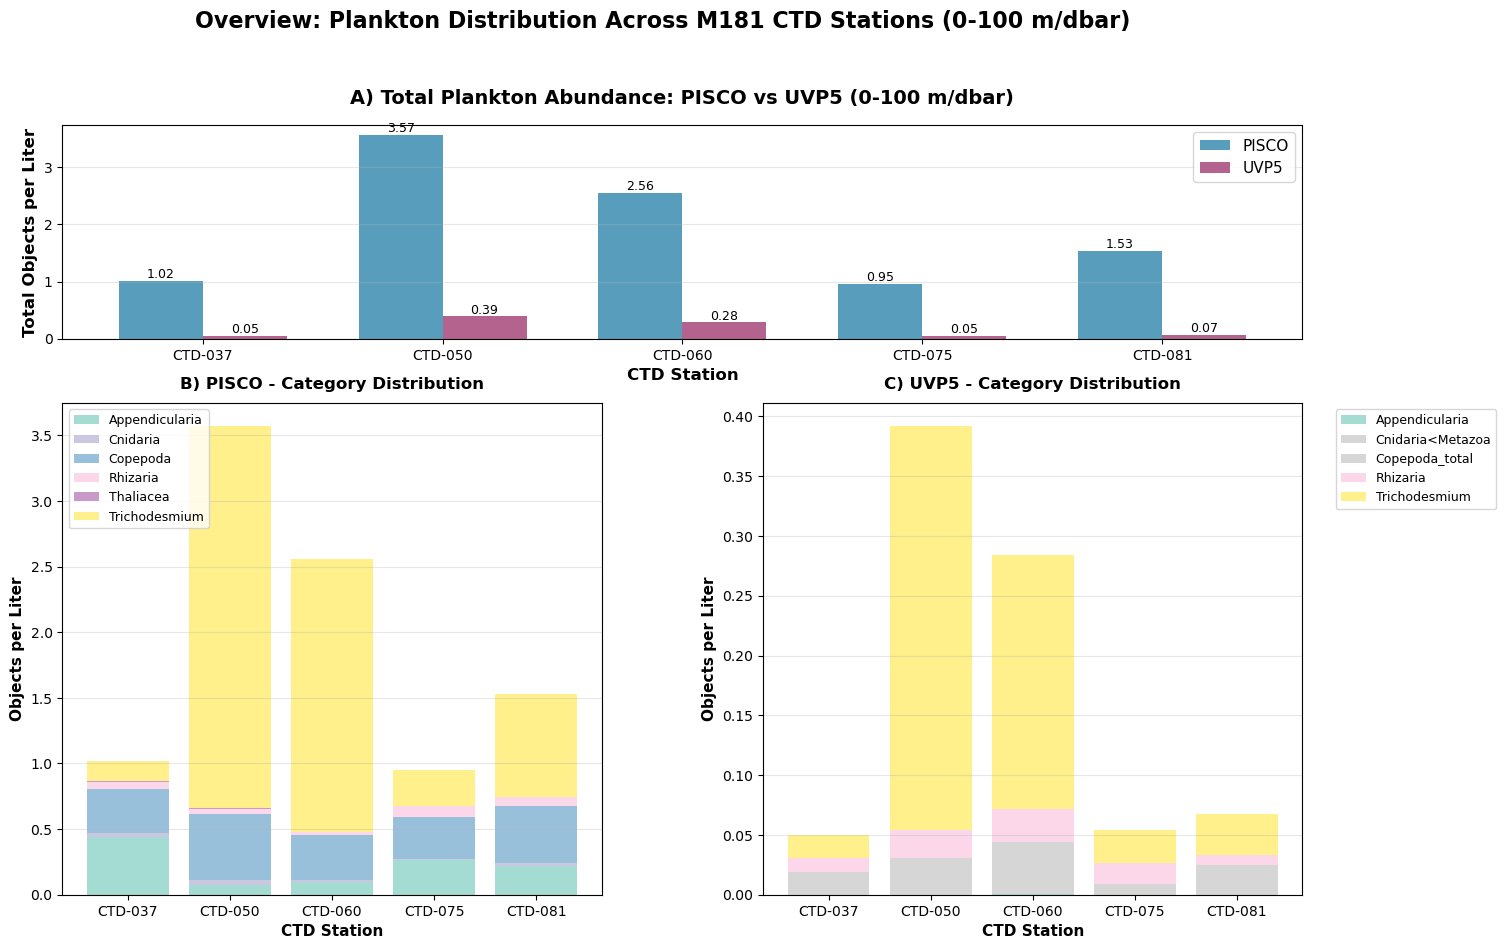


=== OVERVIEW FIGURE COMPLETE ===

Summary Statistics:
PISCO - Mean abundance: 1.925 objects/L (range: 0.953-3.569)
UVP5  - Mean abundance: 0.170 objects/L (range: 0.050-0.392)
Mean ratio (PISCO/UVP5): 11.35x


In [33]:
# Create overview figure for Results section - Total plankton distribution across stations
print("=== CREATING RESULTS OVERVIEW FIGURE ===\n")

# Prepare data summary
pisco_summary = []
uvp5_summary = []

# Collect PISCO data
for profile in sorted(pisco_data.keys(), key=lambda x: int(x.split('-')[-1])):
    station = profile.split('-')[-1]
    total_per_L = sum(pisco_data[profile]['total_counts'].values())
    volume = pisco_data[profile]['total_volume']
    pisco_summary.append({
        'Station': f'CTD-{station}',
        'Total_per_L': total_per_L,
        'Volume_L': volume,
        'Instrument': 'PISCO'
    })

# Collect UVP5 data
for profile in sorted(uvp5_data.keys(), key=lambda x: int(x.split('-')[-1])):
    station = profile.split('-')[-1]
    total_per_L = sum(uvp5_data[profile]['total_counts'].values())
    volume = uvp5_data[profile]['total_volume']
    uvp5_summary.append({
        'Station': f'CTD-{station}',
        'Total_per_L': total_per_L,
        'Volume_L': volume,
        'Instrument': 'UVP5'
    })

# Create combined DataFrame
summary_df = pd.DataFrame(pisco_summary + uvp5_summary)

# Create overview figure
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Total abundance comparison (top, spanning both columns)
ax1 = fig.add_subplot(gs[0, :])

stations = [f'CTD-{x}' for x in ['037', '050', '060', '075', '081']]
x = np.arange(len(stations))
width = 0.35

pisco_vals = [summary_df[(summary_df['Station'] == s) & (summary_df['Instrument'] == 'PISCO')]['Total_per_L'].values[0] 
              for s in stations]
uvp5_vals = [summary_df[(summary_df['Station'] == s) & (summary_df['Instrument'] == 'UVP5')]['Total_per_L'].values[0] 
             for s in stations]

bars1 = ax1.bar(x - width/2, pisco_vals, width, label='PISCO', alpha=0.8, color='#2E86AB')
bars2 = ax1.bar(x + width/2, uvp5_vals, width, label='UVP5', alpha=0.8, color='#A23B72')

ax1.set_ylabel('Total Objects per Liter', fontsize=12, fontweight='bold')
ax1.set_xlabel('CTD Station', fontsize=12, fontweight='bold')
ax1.set_title('A) Total Plankton Abundance: PISCO vs UVP5 (0-100 m/dbar)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(stations)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

# Plot 2: PISCO category breakdown (bottom left)
ax2 = fig.add_subplot(gs[1:, 0])

# Get all categories and prepare stacked data for PISCO
pisco_profiles_sorted = sorted(pisco_data.keys(), key=lambda x: int(x.split('-')[-1]))
categories = sorted(list(set().union(*[set(pisco_data[p]['total_counts'].keys()) for p in pisco_profiles_sorted])))

colors_cat = plt.cm.Set3(np.linspace(0, 1, len(categories)))
color_map_cat = dict(zip(categories, colors_cat))

bottom_counts = np.zeros(len(pisco_profiles_sorted))
for category in categories:
    values = [pisco_data[profile]['total_counts'].get(category, 0) for profile in pisco_profiles_sorted]
    ax2.bar(range(len(pisco_profiles_sorted)), values, bottom=bottom_counts,
            label=category, color=color_map_cat[category], alpha=0.8)
    bottom_counts += np.array(values)

ax2.set_ylabel('Objects per Liter', fontsize=11, fontweight='bold')
ax2.set_xlabel('CTD Station', fontsize=11, fontweight='bold')
ax2.set_title('B) PISCO - Category Distribution', fontsize=12, fontweight='bold', pad=10)
ax2.set_xticks(range(len(stations)))
ax2.set_xticklabels(stations)
ax2.legend(loc='upper left', fontsize=9)  # Changed from bbox_to_anchor to loc='upper left'
ax2.grid(axis='y', alpha=0.3)

# Plot 3: UVP5 category breakdown (bottom right)
ax3 = fig.add_subplot(gs[1:, 1])

uvp5_profiles_sorted = sorted(uvp5_data.keys(), key=lambda x: int(x.split('-')[-1]))
uvp5_categories = sorted(list(set().union(*[set(uvp5_data[p]['total_counts'].keys()) for p in uvp5_profiles_sorted])))

bottom_counts_uvp5 = np.zeros(len(uvp5_profiles_sorted))
for category in uvp5_categories:
    values = [uvp5_data[profile]['total_counts'].get(category, 0) for profile in uvp5_profiles_sorted]
    ax3.bar(range(len(uvp5_profiles_sorted)), values, bottom=bottom_counts_uvp5,
            label=category, color=color_map_cat.get(category, '#CCCCCC'), alpha=0.8)
    bottom_counts_uvp5 += np.array(values)

ax3.set_ylabel('Objects per Liter', fontsize=11, fontweight='bold')
ax3.set_xlabel('CTD Station', fontsize=11, fontweight='bold')
ax3.set_title('C) UVP5 - Category Distribution', fontsize=12, fontweight='bold', pad=10)
ax3.set_xticks(range(len(stations)))
ax3.set_xticklabels(stations)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax3.grid(axis='y', alpha=0.3)

plt.suptitle('Overview: Plankton Distribution Across M181 CTD Stations (0-100 m/dbar)',
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

print("\n=== OVERVIEW FIGURE COMPLETE ===")
print("\nSummary Statistics:")
print(f"PISCO - Mean abundance: {np.mean(pisco_vals):.3f} objects/L (range: {np.min(pisco_vals):.3f}-{np.max(pisco_vals):.3f})")
print(f"UVP5  - Mean abundance: {np.mean(uvp5_vals):.3f} objects/L (range: {np.min(uvp5_vals):.3f}-{np.max(uvp5_vals):.3f})")
print(f"Mean ratio (PISCO/UVP5): {np.mean(pisco_vals)/np.mean(uvp5_vals):.2f}x")

In [34]:
# Calculate comprehensive statistics for reporting
print("=" * 70)
print("COMPREHENSIVE STATISTICS SUMMARY FOR RESULTS SECTION")
print("=" * 70)

# Extract data from the overview figure calculations
stations = [f'CTD-{x}' for x in ['037', '050', '060', '075', '081']]

# PISCO statistics (from pisco_data dictionary - cells 2-6)
pisco_profiles = sorted(pisco_data.keys(), key=lambda x: int(x.split('-')[-1]))
pisco_abundances = []
pisco_volumes = []
pisco_biovolumes = []
pisco_total_objects = []

for profile in pisco_profiles:
    total_per_L = sum(pisco_data[profile]['total_counts'].values())
    pisco_abundances.append(total_per_L)
    pisco_volumes.append(pisco_data[profile]['total_volume'])
    
    # Calculate total biovolume (would need to be added if available)
    # For now, placeholder

print("\n" + "="*70)
print("1. SAMPLING EFFORT")
print("="*70)
print(f"Number of CTD stations: {len(stations)}")
print(f"Depth range analyzed: 0-100 m/dbar")
print(f"\nPISCO:")
print(f"  Total water volume sampled: {sum(pisco_volumes):.1f} L")
print(f"  Mean volume per station: {np.mean(pisco_volumes):.1f} ± {np.std(pisco_volumes):.1f} L")
print(f"  Range: {min(pisco_volumes):.1f} - {max(pisco_volumes):.1f} L")

# UVP5 statistics (from uvp5_data dictionary - cell 3)
uvp5_profiles = sorted(uvp5_data.keys(), key=lambda x: int(x.split('-')[-1]))
uvp5_abundances = []
uvp5_volumes = []

for profile in uvp5_profiles:
    total_per_L = sum(uvp5_data[profile]['total_counts'].values())
    uvp5_abundances.append(total_per_L)
    uvp5_volumes.append(uvp5_data[profile]['total_volume'])

print(f"\nUVP5:")
print(f"  Total water volume sampled: {sum(uvp5_volumes):.1f} L")
print(f"  Mean volume per station: {np.mean(uvp5_volumes):.1f} ± {np.std(uvp5_volumes):.1f} L")
print(f"  Range: {min(uvp5_volumes):.1f} - {max(uvp5_volumes):.1f} L")

print(f"\nVolume ratio (UVP5/PISCO): {sum(uvp5_volumes)/sum(pisco_volumes):.2f}x")

print("\n" + "="*70)
print("2. PLANKTON ABUNDANCE (0-100 m/dbar)")
print("="*70)

print(f"\nPISCO:")
print(f"  Mean abundance: {np.mean(pisco_abundances):.3f} ± {np.std(pisco_abundances):.3f} objects/L")
print(f"  Range: {min(pisco_abundances):.3f} - {max(pisco_abundances):.3f} objects/L")
print(f"  Total objects detected: {sum([pisco_data[p]['total_volume'] * sum(pisco_data[p]['total_counts'].values()) for p in pisco_profiles]):.0f}")

print(f"\nUVP5:")
print(f"  Mean abundance: {np.mean(uvp5_abundances):.3f} ± {np.std(uvp5_abundances):.3f} objects/L")
print(f"  Range: {min(uvp5_abundances):.3f} - {max(uvp5_abundances):.3f} objects/L")
print(f"  Total objects detected: {sum([uvp5_data[p]['total_volume'] * sum(uvp5_data[p]['total_counts'].values()) for p in uvp5_profiles]):.0f}")

print(f"\nAbundance ratio (PISCO/UVP5): {np.mean(pisco_abundances)/np.mean(uvp5_abundances):.2f}x")
print(f"  PISCO detected {np.mean(pisco_abundances)/np.mean(uvp5_abundances):.1f} times more plankton per liter")

print("\n" + "="*70)
print("3. COMMUNITY COMPOSITION - PISCO")
print("="*70)

# Get all categories from PISCO
all_pisco_categories = set()
for profile_data in pisco_data.values():
    all_pisco_categories.update(profile_data['total_counts'].keys())

pisco_category_totals = {}
for category in sorted(all_pisco_categories):
    total = sum(pisco_data[p]['total_counts'].get(category, 0) for p in pisco_profiles)
    avg = total / len(pisco_profiles)
    pisco_category_totals[category] = avg

total_pisco_abundance = sum(pisco_category_totals.values())

print("\nMean abundance by category (objects/L):")
for category, abundance in sorted(pisco_category_totals.items(), key=lambda x: x[1], reverse=True):
    percentage = (abundance / total_pisco_abundance) * 100
    print(f"  {category:20s}: {abundance:8.4f} ({percentage:5.1f}%)")

print(f"\nDominant groups (>10% of total):")
for category, abundance in sorted(pisco_category_totals.items(), key=lambda x: x[1], reverse=True):
    percentage = (abundance / total_pisco_abundance) * 100
    if percentage > 10:
        print(f"  {category}: {percentage:.1f}%")

print("\n" + "="*70)
print("4. COMMUNITY COMPOSITION - UVP5")
print("="*70)

# Get all categories from UVP5
all_uvp5_categories = set()
for profile_data in uvp5_data.values():
    all_uvp5_categories.update(profile_data['total_counts'].keys())

uvp5_category_totals = {}
for category in sorted(all_uvp5_categories):
    total = sum(uvp5_data[p]['total_counts'].get(category, 0) for p in uvp5_profiles)
    avg = total / len(uvp5_profiles)
    uvp5_category_totals[category] = avg

total_uvp5_abundance = sum(uvp5_category_totals.values())

print("\nMean abundance by category (objects/L):")
for category, abundance in sorted(uvp5_category_totals.items(), key=lambda x: x[1], reverse=True):
    percentage = (abundance / total_uvp5_abundance) * 100
    print(f"  {category:20s}: {abundance:8.4f} ({percentage:5.1f}%)")

print(f"\nDominant groups (>10% of total):")
for category, abundance in sorted(uvp5_category_totals.items(), key=lambda x: x[1], reverse=True):
    percentage = (abundance / total_uvp5_abundance) * 100
    if percentage > 10:
        print(f"  {category}: {percentage:.1f}%")

print("\n" + "="*70)
print("5. INTER-INSTRUMENT COMPARISON BY CATEGORY")
print("="*70)

# Find common categories
common_categories = set(pisco_category_totals.keys()) & set(uvp5_category_totals.keys())
pisco_only = set(pisco_category_totals.keys()) - set(uvp5_category_totals.keys())
uvp5_only = set(uvp5_category_totals.keys()) - set(pisco_category_totals.keys())

print(f"\nCommon categories ({len(common_categories)}): {sorted(common_categories)}")
print(f"PISCO-only categories ({len(pisco_only)}): {sorted(pisco_only)}")
print(f"UVP5-only categories ({len(uvp5_only)}): {sorted(uvp5_only)}")

print("\nRatios for common categories (PISCO/UVP5):")
for category in sorted(common_categories):
    pisco_val = pisco_category_totals[category]
    uvp5_val = uvp5_category_totals[category]
    if uvp5_val > 0:
        ratio = pisco_val / uvp5_val
        print(f"  {category:20s}: {ratio:6.2f}x")
    else:
        print(f"  {category:20s}: UVP5 not detected")

print("\n" + "="*70)
print("6. STATION-BY-STATION COMPARISON")
print("="*70)

comparison_table = []
for i, station in enumerate(stations):
    pisco_profile = pisco_profiles[i]
    uvp5_profile = uvp5_profiles[i]
    
    pisco_total = sum(pisco_data[pisco_profile]['total_counts'].values())
    uvp5_total = sum(uvp5_data[uvp5_profile]['total_counts'].values())
    ratio = pisco_total / uvp5_total if uvp5_total > 0 else float('inf')
    
    comparison_table.append({
        'Station': station,
        'PISCO (obj/L)': pisco_total,
        'UVP5 (obj/L)': uvp5_total,
        'Ratio': ratio,
        'PISCO Vol (L)': pisco_data[pisco_profile]['total_volume'],
        'UVP5 Vol (L)': uvp5_data[uvp5_profile]['total_volume']
    })

comparison_df = pd.DataFrame(comparison_table)
print("\n", comparison_df.to_string(index=False, float_format=lambda x: f'{x:.3f}'))

print("\n" + "="*70)
print("END OF STATISTICS SUMMARY")
print("="*70)

COMPREHENSIVE STATISTICS SUMMARY FOR RESULTS SECTION

1. SAMPLING EFFORT
Number of CTD stations: 5
Depth range analyzed: 0-100 m/dbar

PISCO:
  Total water volume sampled: 16200.1 L
  Mean volume per station: 3240.0 ± 859.6 L
  Range: 2203.2 - 4820.2 L

UVP5:
  Total water volume sampled: 22132.3 L
  Mean volume per station: 4426.5 ± 225.9 L
  Range: 4206.7 - 4751.0 L

Volume ratio (UVP5/PISCO): 1.37x

2. PLANKTON ABUNDANCE (0-100 m/dbar)

PISCO:
  Mean abundance: 1.925 ± 1.003 objects/L
  Range: 0.953 - 3.569 objects/L
  Total objects detected: 30212

UVP5:
  Mean abundance: 0.170 ± 0.142 objects/L
  Range: 0.050 - 0.392 objects/L
  Total objects detected: 3781

Abundance ratio (PISCO/UVP5): 11.35x
  PISCO detected 11.4 times more plankton per liter

3. COMMUNITY COMPOSITION - PISCO

Mean abundance by category (objects/L):
  Trichodesmium       :   1.2385 ( 64.3%)
  Copepoda            :   0.3835 ( 19.9%)
  Appendicularia      :   0.2196 ( 11.4%)
  Rhizaria            :   0.0541 (  2.

=== CREATING BIOVOLUME OVERVIEW FIGURE ===



C:\Users\fanny\AppData\Local\Temp\ipykernel_17632\3359278636.py:207: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


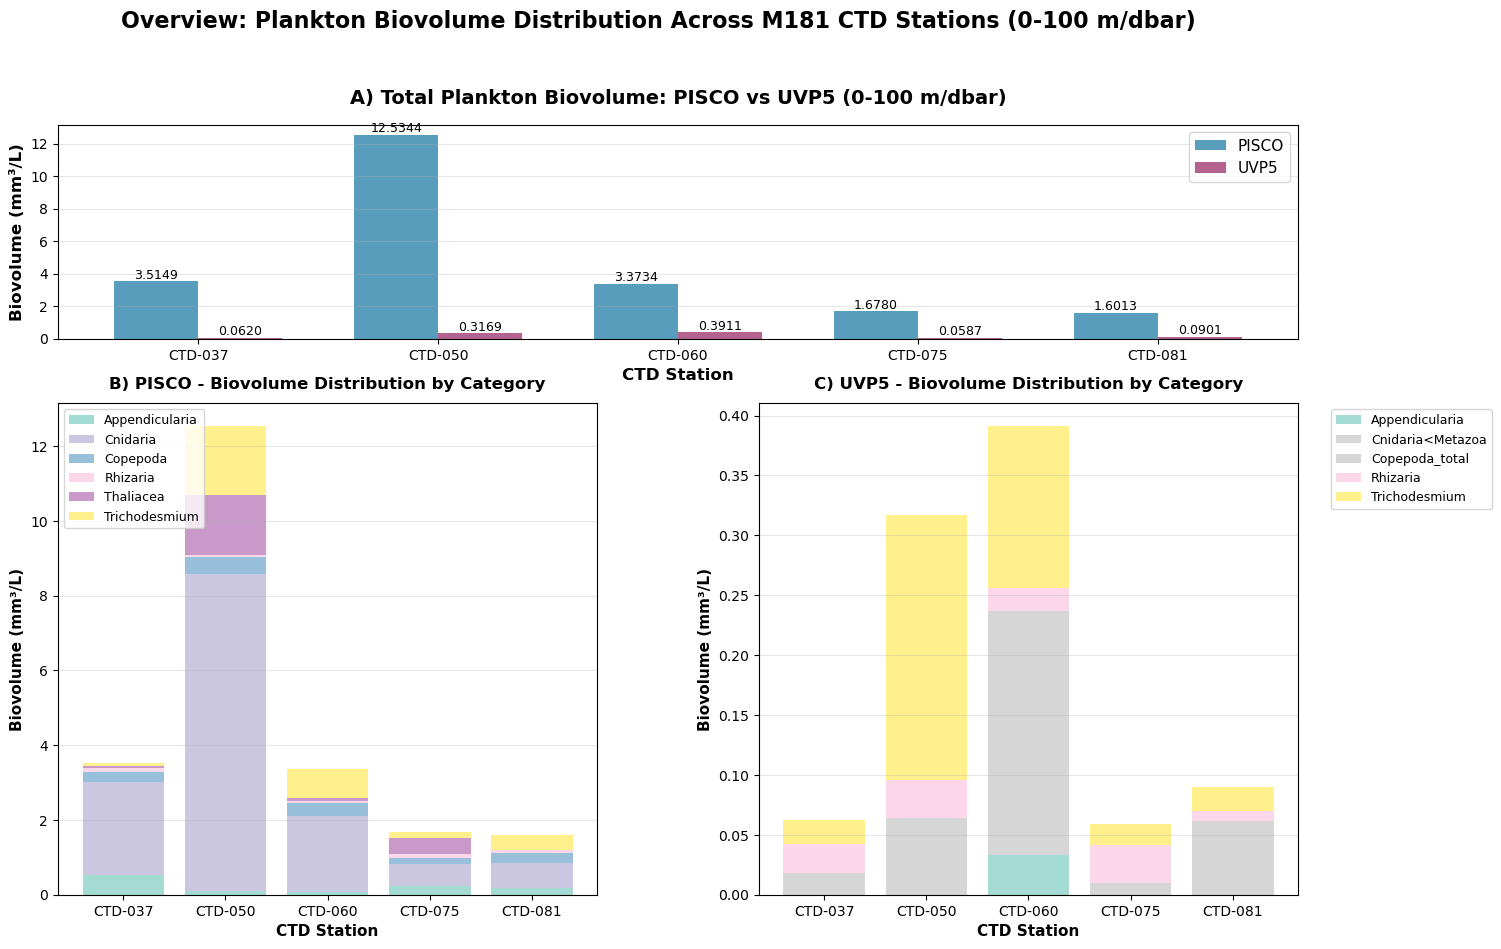


=== BIOVOLUME OVERVIEW FIGURE COMPLETE ===

Summary Statistics:
PISCO - Mean biovolume: 4.540412 mm³/L (range: 1.601323-12.534395)
UVP5  - Mean biovolume: 0.183781 mm³/L (range: 0.058736-0.391107)
Mean ratio (PISCO/UVP5): 24.71x


In [35]:
# Create overview figure for Results section - Total plankton biovolume distribution across stations
print("=== CREATING BIOVOLUME OVERVIEW FIGURE ===\n")

# Prepare biovolume data summary
pisco_biovolume_summary = []
uvp5_biovolume_summary = []

# Collect PISCO biovolume data
for profile in sorted(pisco_data.keys(), key=lambda x: int(x.split('-')[-1])):
    station = profile.split('-')[-1]
    
    # Load the profile dataset to get biovolume data
    try:
        pisco_df = pd.read_csv(f"{profile}_binned_data.csv")
        
        # Filter to 0-100 dbar
        depth_filter = [int(bin_label.split('-')[0].replace('dbar', '')) <= 100 for bin_label in pisco_df['pressure_bin']]
        pisco_filtered = pisco_df[depth_filter]
        
        if len(pisco_filtered) > 0:
            total_volume = pisco_filtered['sampled_volume_L'].sum()
            total_biovolume = pisco_filtered['total_biovolume_mm3'].sum()
            biovolume_per_L = total_biovolume / total_volume if total_volume > 0 else 0
            
            pisco_biovolume_summary.append({
                'Station': f'CTD-{station}',
                'Biovolume_per_L': biovolume_per_L,
                'Volume_L': total_volume,
                'Instrument': 'PISCO'
            })
    except FileNotFoundError:
        print(f"File {profile}_binned_data.csv not found")

# Collect UVP5 biovolume data
for profile in sorted(uvp5_data.keys(), key=lambda x: int(x.split('-')[-1])):
    station = profile.split('-')[-1]
    
    # Load the profile dataset to get biovolume data
    try:
        uvp5_df = pd.read_csv(f"{profile}_crop_binned_normalized.csv")
        
        # Filter to 0-100m
        depth_filter = [int(bin_label.split('-')[0].replace('m', '')) <= 100 for bin_label in uvp5_df['depth_bin'] if pd.notna(bin_label)]
        depth_filter_mask = [pd.notna(bin_label) and int(bin_label.split('-')[0].replace('m', '')) <= 100 for bin_label in uvp5_df['depth_bin']]
        uvp5_filtered = uvp5_df[depth_filter_mask]
        
        if len(uvp5_filtered) > 0:
            total_volume = uvp5_filtered['sampled_volume_L'].sum()
            total_biovolume = uvp5_filtered['total_biovolume_mm3'].sum()
            biovolume_per_L = total_biovolume / total_volume if total_volume > 0 else 0
            
            uvp5_biovolume_summary.append({
                'Station': f'CTD-{station}',
                'Biovolume_per_L': biovolume_per_L,
                'Volume_L': total_volume,
                'Instrument': 'UVP5'
            })
    except FileNotFoundError:
        print(f"File {profile}_crop_binned_normalized.csv not found")

# Create combined DataFrame
biovolume_summary_df = pd.DataFrame(pisco_biovolume_summary + uvp5_biovolume_summary)

# Create overview figure
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Total biovolume comparison (top, spanning both columns)
ax1 = fig.add_subplot(gs[0, :])

stations = [f'CTD-{x}' for x in ['037', '050', '060', '075', '081']]
x = np.arange(len(stations))
width = 0.35

pisco_biovolume_vals = [biovolume_summary_df[(biovolume_summary_df['Station'] == s) & (biovolume_summary_df['Instrument'] == 'PISCO')]['Biovolume_per_L'].values[0] 
                        if len(biovolume_summary_df[(biovolume_summary_df['Station'] == s) & (biovolume_summary_df['Instrument'] == 'PISCO')]) > 0 else 0
                        for s in stations]
uvp5_biovolume_vals = [biovolume_summary_df[(biovolume_summary_df['Station'] == s) & (biovolume_summary_df['Instrument'] == 'UVP5')]['Biovolume_per_L'].values[0]
                       if len(biovolume_summary_df[(biovolume_summary_df['Station'] == s) & (biovolume_summary_df['Instrument'] == 'UVP5')]) > 0 else 0
                       for s in stations]

bars1 = ax1.bar(x - width/2, pisco_biovolume_vals, width, label='PISCO', alpha=0.8, color='#2E86AB')
bars2 = ax1.bar(x + width/2, uvp5_biovolume_vals, width, label='UVP5', alpha=0.8, color='#A23B72')

ax1.set_ylabel('Biovolume (mm³/L)', fontsize=12, fontweight='bold')
ax1.set_xlabel('CTD Station', fontsize=12, fontweight='bold')
ax1.set_title('A) Total Plankton Biovolume: PISCO vs UVP5 (0-100 m/dbar)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(stations)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)

# Plot 2: PISCO category breakdown by biovolume (bottom left)
ax2 = fig.add_subplot(gs[1:, 0])

# Get biovolume data by category for PISCO
pisco_profiles_sorted = sorted(pisco_data.keys(), key=lambda x: int(x.split('-')[-1]))

# Load actual biovolume data from CSV files
pisco_biovolume_by_category = {}
for profile in pisco_profiles_sorted:
    try:
        df = pd.read_csv(f"{profile}_binned_data.csv")
        depth_filter = [int(bin_label.split('-')[0].replace('dbar', '')) <= 100 for bin_label in df['pressure_bin']]
        filtered_df = df[depth_filter]
        
        if len(filtered_df) > 0:
            total_volume = filtered_df['sampled_volume_L'].sum()
            biovolume_cols = [col for col in filtered_df.columns if col.startswith('biovolume_') and col.endswith('_mm3') and not col.startswith('biovolume_per_L')]
            
            for biovolume_col in biovolume_cols:
                category = biovolume_col.replace('biovolume_', '').replace('_mm3', '')
                total_biovolume = filtered_df[biovolume_col].sum()
                biovolume_per_L = total_biovolume / total_volume if total_volume > 0 else 0
                
                if category not in pisco_biovolume_by_category:
                    pisco_biovolume_by_category[category] = []
                pisco_biovolume_by_category[category].append(biovolume_per_L)
    except:
        pass

categories_pisco = sorted(pisco_biovolume_by_category.keys())
colors_cat = plt.cm.Set3(np.linspace(0, 1, len(categories_pisco)))
color_map_cat = dict(zip(categories_pisco, colors_cat))

bottom_biovolume = np.zeros(len(pisco_profiles_sorted))
for category in categories_pisco:
    values = pisco_biovolume_by_category[category]
    ax2.bar(range(len(pisco_profiles_sorted)), values, bottom=bottom_biovolume,
            label=category, color=color_map_cat[category], alpha=0.8)
    bottom_biovolume += np.array(values)

ax2.set_ylabel('Biovolume (mm³/L)', fontsize=11, fontweight='bold')
ax2.set_xlabel('CTD Station', fontsize=11, fontweight='bold')
ax2.set_title('B) PISCO - Biovolume Distribution by Category', fontsize=12, fontweight='bold', pad=10)
ax2.set_xticks(range(len(stations)))
ax2.set_xticklabels(stations)
ax2.legend(loc='upper left', fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# Plot 3: UVP5 category breakdown by biovolume (bottom right)
ax3 = fig.add_subplot(gs[1:, 1])

# Get biovolume data by category for UVP5
uvp5_profiles_sorted = sorted(uvp5_data.keys(), key=lambda x: int(x.split('-')[-1]))

uvp5_biovolume_by_category = {}
for profile in uvp5_profiles_sorted:
    try:
        df = pd.read_csv(f"{profile}_crop_binned_normalized.csv")
        depth_filter_mask = [pd.notna(bin_label) and int(bin_label.split('-')[0].replace('m', '')) <= 100 for bin_label in df['depth_bin']]
        filtered_df = df[depth_filter_mask]
        
        if len(filtered_df) > 0:
            total_volume = filtered_df['sampled_volume_L'].sum()
            biovolume_cols = [col for col in filtered_df.columns if col.startswith('biovolume_') and col.endswith('_mm3') and not col.startswith('biovolume_per_L')]
            
            # Initialize all categories for this profile
            for biovolume_col in biovolume_cols:
                category = biovolume_col.replace('biovolume_', '').replace('_mm3', '')
                if category not in uvp5_biovolume_by_category:
                    uvp5_biovolume_by_category[category] = [0] * len(uvp5_profiles_sorted)
            
            # Now fill in the actual values
            profile_index = uvp5_profiles_sorted.index(profile)
            for biovolume_col in biovolume_cols:
                category = biovolume_col.replace('biovolume_', '').replace('_mm3', '')
                total_biovolume = filtered_df[biovolume_col].sum()
                biovolume_per_L = total_biovolume / total_volume if total_volume > 0 else 0
                uvp5_biovolume_by_category[category][profile_index] = biovolume_per_L
    except Exception as e:
        print(f"Error processing {profile}: {e}")

categories_uvp5 = sorted(uvp5_biovolume_by_category.keys())

bottom_biovolume_uvp5 = np.zeros(len(uvp5_profiles_sorted))
for category in categories_uvp5:
    values = uvp5_biovolume_by_category[category]
    # Verify the length matches before plotting
    if len(values) == len(uvp5_profiles_sorted):
        ax3.bar(range(len(uvp5_profiles_sorted)), values, bottom=bottom_biovolume_uvp5,
                label=category, color=color_map_cat.get(category, '#CCCCCC'), alpha=0.8)
        bottom_biovolume_uvp5 += np.array(values)
    else:
        print(f"Warning: Skipping category {category} - length mismatch ({len(values)} vs {len(uvp5_profiles_sorted)})")

ax3.set_ylabel('Biovolume (mm³/L)', fontsize=11, fontweight='bold')
ax3.set_xlabel('CTD Station', fontsize=11, fontweight='bold')
ax3.set_title('C) UVP5 - Biovolume Distribution by Category', fontsize=12, fontweight='bold', pad=10)
ax3.set_xticks(range(len(stations)))
ax3.set_xticklabels(stations)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax3.grid(axis='y', alpha=0.3)

plt.suptitle('Overview: Plankton Biovolume Distribution Across M181 CTD Stations (0-100 m/dbar)',
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

print("\n=== BIOVOLUME OVERVIEW FIGURE COMPLETE ===")
print("\nSummary Statistics:")
print(f"PISCO - Mean biovolume: {np.mean(pisco_biovolume_vals):.6f} mm³/L (range: {np.min(pisco_biovolume_vals):.6f}-{np.max(pisco_biovolume_vals):.6f})")
print(f"UVP5  - Mean biovolume: {np.mean(uvp5_biovolume_vals):.6f} mm³/L (range: {np.min(uvp5_biovolume_vals):.6f}-{np.max(uvp5_biovolume_vals):.6f})")
if np.mean(uvp5_biovolume_vals) > 0:
    print(f"Mean ratio (PISCO/UVP5): {np.mean(pisco_biovolume_vals)/np.mean(uvp5_biovolume_vals):.2f}x")